In [ ]:
from google.colab import files
import pandas as pd

# Step 1: Upload the dataset
uploaded = files.upload()

# Step 2: Load the dataset into a Pandas DataFrame
# Assuming your file is a CSV, replace 'your_dataset.csv' with the exact filename after upload
filename = list(uploaded.keys())[0]  # Automatically fetch the uploaded file name
df = pd.read_csv(filename)

# Preview the first few rows of the dataset
print("Dataset loaded successfully!")
print(df.head())


Saving dataset_smishviz_121120241055.csv to dataset_smishviz_121120241055.csv
Dataset loaded successfully!
   messageid                                           Fulltext  \
0       1141  13:40\n+\n8\n+1 (424) 466-2198 >\nText Message...   
1        783  46\n17:53\nO\nCitiAlrt: Your debit has been di...   
2        824  VZW Wi-Fi\n2:12 PM\nalerts@wellsfargo.departme...   
3        919  (646) 250-2340\nWednesday, December 1, 2021 4:...   
4         54  8:16 G / nu f\n< +17203471494\nAdd to contacts...   

                                Sender     SenderType          timeReceived  \
0                    +1 (424) 466-2198   Phone Number  09/15/2023, 20:41:16   
1                    +1 (803) 599-9244   Phone Number  05/16/2023, 04:28:55   
2  alerts@wellsfargo.department600.com  Email To Text  05/20/2023, 00:45:36   
3                       (646) 250-2340   Phone Number  05/25/2023, 19:47:33   
4                          17203471494   Phone Number  05/04/2022, 12:18:02   

               

In [ ]:
import pandas as pd

# Assuming your dataset is in a CSV file, load it into a DataFrame
# Replace 'your_dataset.csv' with your actual file path
#df = pd.read_csv('your_dataset.csv')

# Check for non-empty values in the 'Brand' column
non_empty_count = df['Brand'].notna().sum()  # Count non-NaN (non-empty) values
total_count = len(df)  # Total number of rows
percentage_non_empty = (non_empty_count / total_count) * 100  # Calculate percentage

# Get the number of distinct non-empty values in the 'Brand' column
distinct_values_count = df['Brand'].nunique()

# Print the results
print(f"Percentage of non-empty values in the 'Brand' column: {percentage_non_empty:.2f}%")
print(f"Number of distinct values in the 'Brand' column: {distinct_values_count}")


Percentage of non-empty values in the 'Brand' column: 65.91%
Number of distinct values in the 'Brand' column: 182


In [ ]:
# Count non-empty (non-NaN and non-empty string) values in the 'Brand' column
non_empty_count = df['Brand'].notna().sum()  # Count non-NaN (non-empty) values
non_empty_unique_values = df['Brand'][df['Brand'].notna() & (df['Brand'].str.strip() != '')].nunique()  # Count unique non-empty values

# Calculate the percentage of rows with non-empty values in the 'Brand' column
total_count = len(df)  # Total number of rows
percentage_non_empty = (non_empty_count / total_count) * 100

# Print the results
print(f"Percentage of non-empty values in the 'Brand' column: {percentage_non_empty:.2f}%")
print(f"Number of non-empty unique values in the 'Brand' column: {non_empty_unique_values}")

Percentage of non-empty values in the 'Brand' column: 65.91%
Number of non-empty unique values in the 'Brand' column: 182


In [ ]:
import pandas as pd

# Load your dataset into a DataFrame
#df = pd.read_csv('your_dataset.csv')

# Group by 'Merged_Cluster_name' and count unique 'Merged_AdjustedSubGroupLabel' values
result = (
    df.groupby('Merged_Cluster_name')['Merged_AdjustedSubGroupLabel']
    .nunique()
    .reset_index()
    .rename(columns={'Merged_AdjustedSubGroupLabel': 'Unique_SubGroup_Count'})
)

# Display the result
print(result)


   Merged_Cluster_name  Unique_SubGroup_Count
0                MC(1)                     21
1               MC(10)                    145
2                MC(2)                    121
3                MC(3)                     16
4                MC(4)                     28
5                MC(5)                      6
6                MC(6)                     12
7                MC(7)                     15
8                MC(8)                      8
9                MC(9)                     12
10         MC(Outlier)                    135


In [ ]:
grouped_clusters = df.groupby('Merged_Cluster_name')['SuperCleanedMessage'].apply(' '.join)

# Generate and display word clouds for each cluster
for cluster_name, text in grouped_clusters.items():
    # Generate word cloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=STOPWORDS
    ).generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.title(f"Word Cloud for '{cluster_name}' Cluster")
    plt.show()

TypeError: sequence item 1: expected str instance, float found

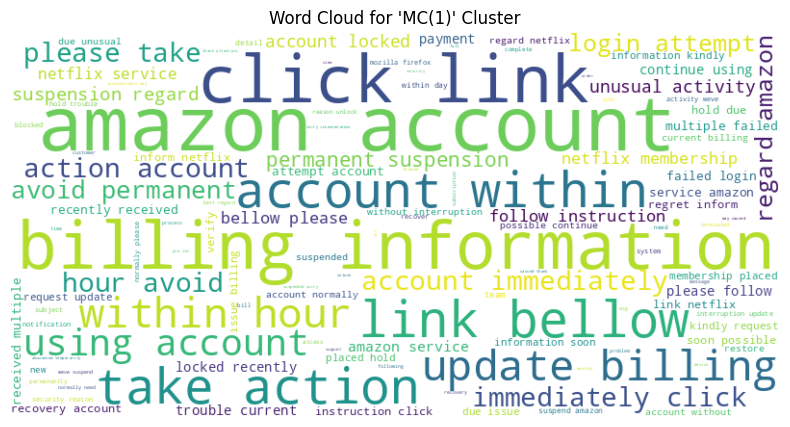

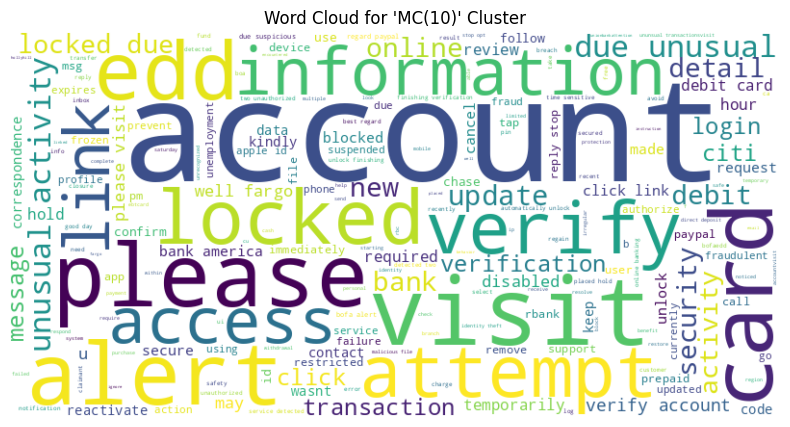

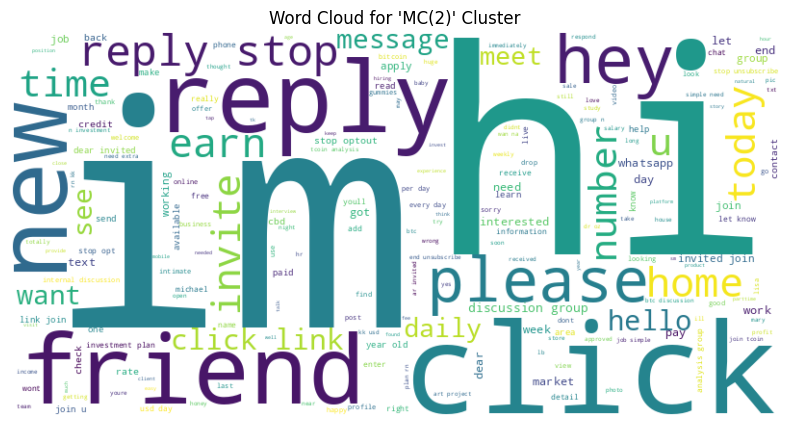

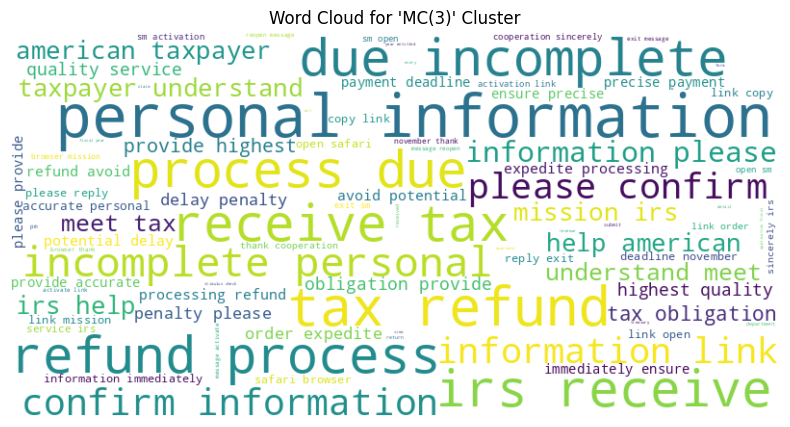

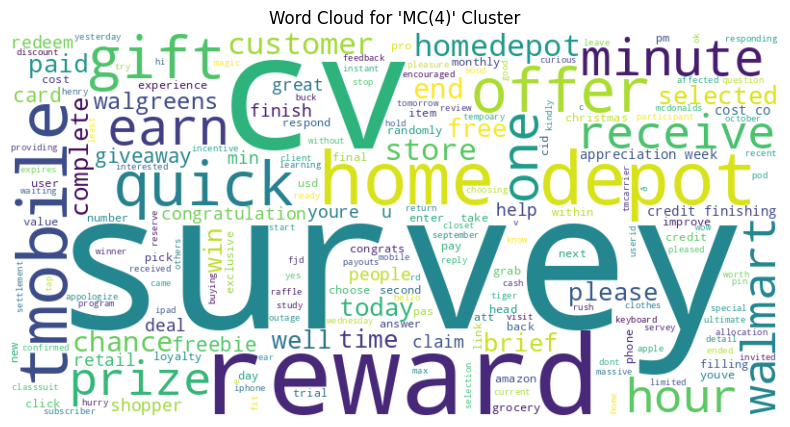

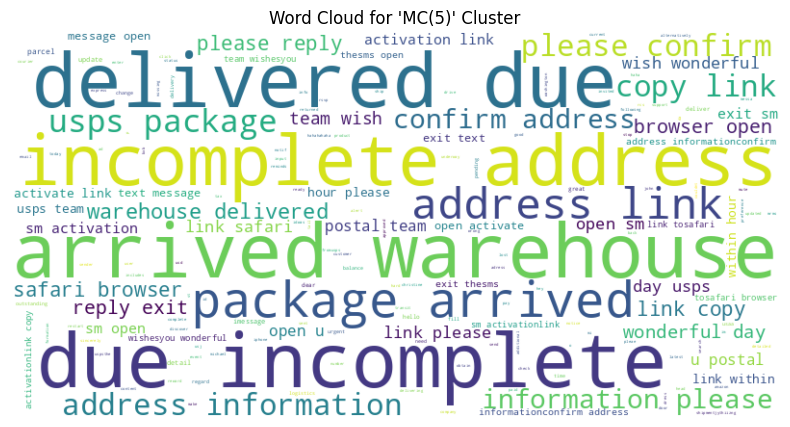

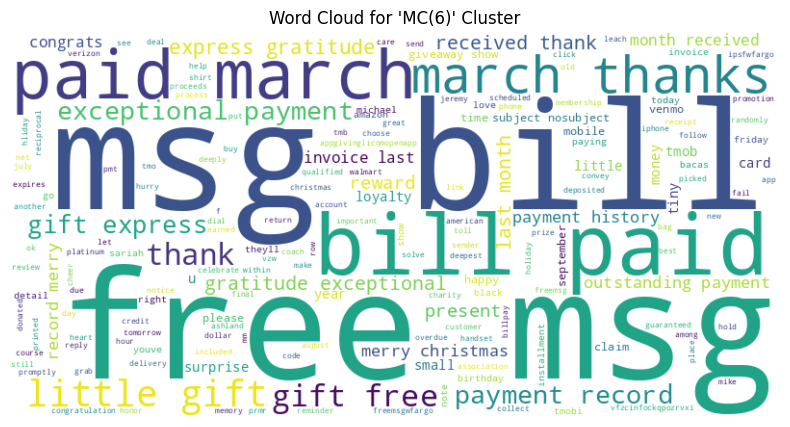

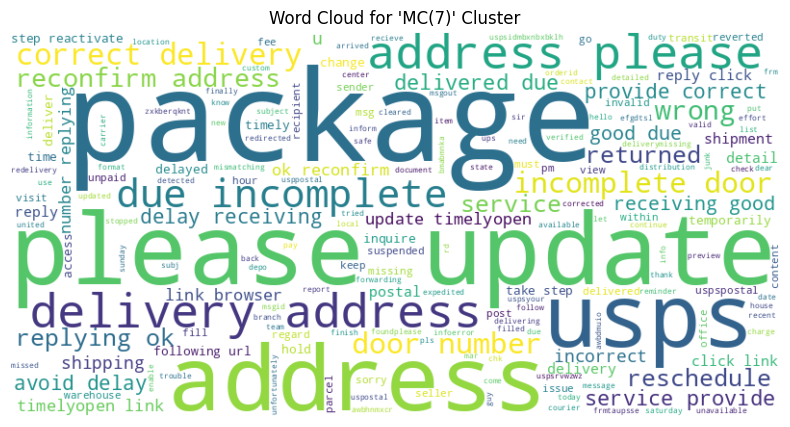

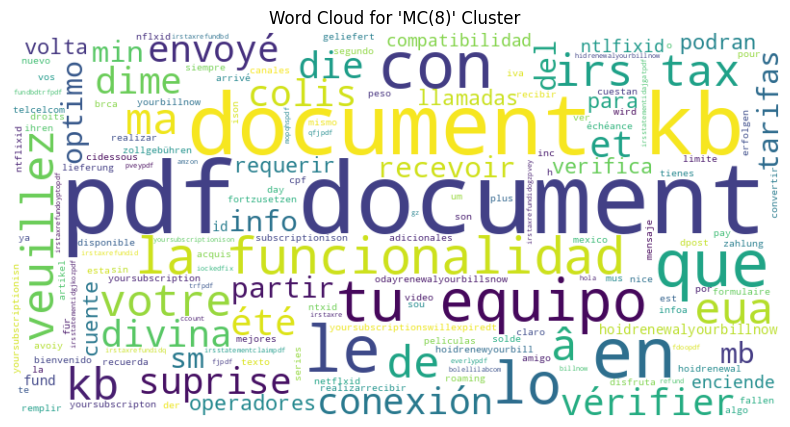

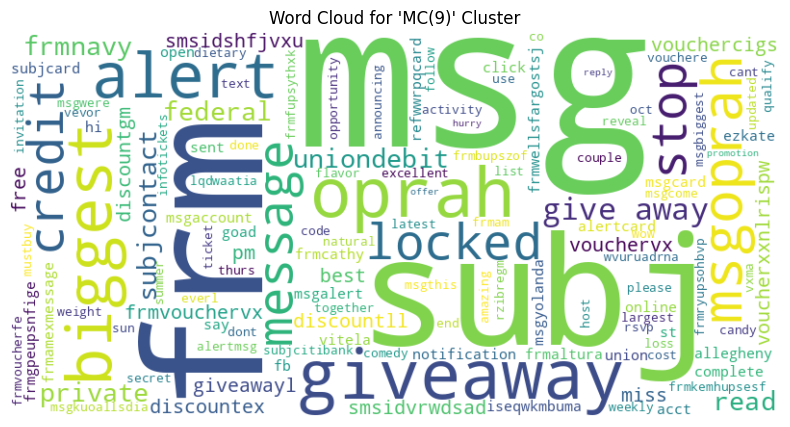

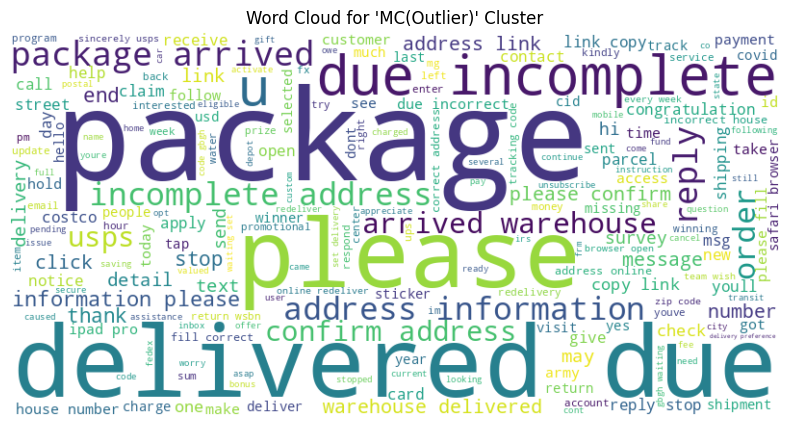

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Step 1: Clean the 'SuperCleanedMessage' column by replacing NaN and non-string values
df['SuperCleanedMessage'] = df['SuperCleanedMessage'].fillna('').astype(str)

# Step 2: Group messages by 'Merged_Cluster_name'
grouped_clusters = df.groupby('Merged_Cluster_name')['SuperCleanedMessage'].apply(' '.join)

# Step 3: Generate and display word clouds for each cluster
for cluster_name, text in grouped_clusters.items():
    # Generate word cloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=STOPWORDS
    ).generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.title(f"Word Cloud for '{cluster_name}' Cluster")
    plt.show()


In [ ]:
import pandas as pd

# Example: Assuming you have a DataFrame with columns "text" and "cluster_label"
#df = pd.DataFrame({'text': texts, 'cluster_label': labels})

# Group by cluster label
grouped_texts = df.groupby('Merged_Cluster_name')['SuperCleanedMessage'].apply(list).to_dict()

# Tokenize the texts (you can use a tokenizer or simple split)
tokenized_clusters = {
    label: [text.split() for text in texts_list]  # Replace with a tokenizer if needed
    for label, texts_list in grouped_texts.items()
}

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

top_words = {}
for label, texts in tokenized_clusters.items():
    # Flatten texts for the cluster
    texts_flat = [" ".join(tokens) for tokens in texts]

    # Use CountVectorizer to get word frequencies
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(texts_flat)

    # Sum the word counts and extract top N words
    word_counts = np.asarray(X.sum(axis=0)).flatten()
    words = vectorizer.get_feature_names_out()
    sorted_indices = word_counts.argsort()[::-1]
    top_words[label] = [words[i] for i in sorted_indices[:5]]

In [ ]:
# Print the top 3 words for each topic
print("Top Words per Topic:\n")
for topic, words in top_words.items():
    print(f"Topic {topic}: {', '.join(words)}")

Top Words per Topic:

Topic MC(1): account, amazon, netflix, link, please
Topic MC(10): account, visit, due, please, card
Topic MC(2): reply, im, join, click, get
Topic MC(3): information, irs, refund, please, tax
Topic MC(4): survey, cv, home, depot, reward
Topic MC(5): link, address, please, open, usps
Topic MC(6): gift, here, thanks, payment, paid
Topic MC(7): address, please, package, delivery, update
Topic MC(8): pdf, kb, document, en, la
Topic MC(9): msg, frm, ever, subj, giveaway
Topic MC(Outlier): please, address, package, link, due


In [ ]:
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel

# Prepare coherence model
dictionary = Dictionary([token for texts in tokenized_clusters.values() for token in texts])
coherence_scores = {}

for label, tokens in tokenized_clusters.items():
    # Coherence Model for each cluster
    coherence_model = CoherenceModel(
        topics=[top_words[label]],
        texts=tokens,
        dictionary=dictionary,
        coherence='c_v'
    )
    coherence_scores[label] = coherence_model.get_coherence()

# Print coherence scores
for label, score in coherence_scores.items():
    print(f"Cluster {label}: Coherence Score = {score}")

# Overall Average Coherence
avg_coherence = sum(coherence_scores.values()) / len(coherence_scores)
print(f"Average Coherence Score: {avg_coherence}")


Cluster MC(1): Coherence Score = 0.3888649848949837
Cluster MC(10): Coherence Score = 0.656004882275872
Cluster MC(2): Coherence Score = 0.2979169528220054
Cluster MC(3): Coherence Score = 0.940475282910819
Cluster MC(4): Coherence Score = 0.5267014210176798
Cluster MC(5): Coherence Score = 0.8468209852930192
Cluster MC(6): Coherence Score = 0.9033489621684078
Cluster MC(7): Coherence Score = 0.8478310411919273
Cluster MC(8): Coherence Score = 1.0000000000000002
Cluster MC(9): Coherence Score = 0.37899564965485405
Cluster MC(Outlier): Coherence Score = 0.9387378857214079
Average Coherence Score: 0.7023361861773615


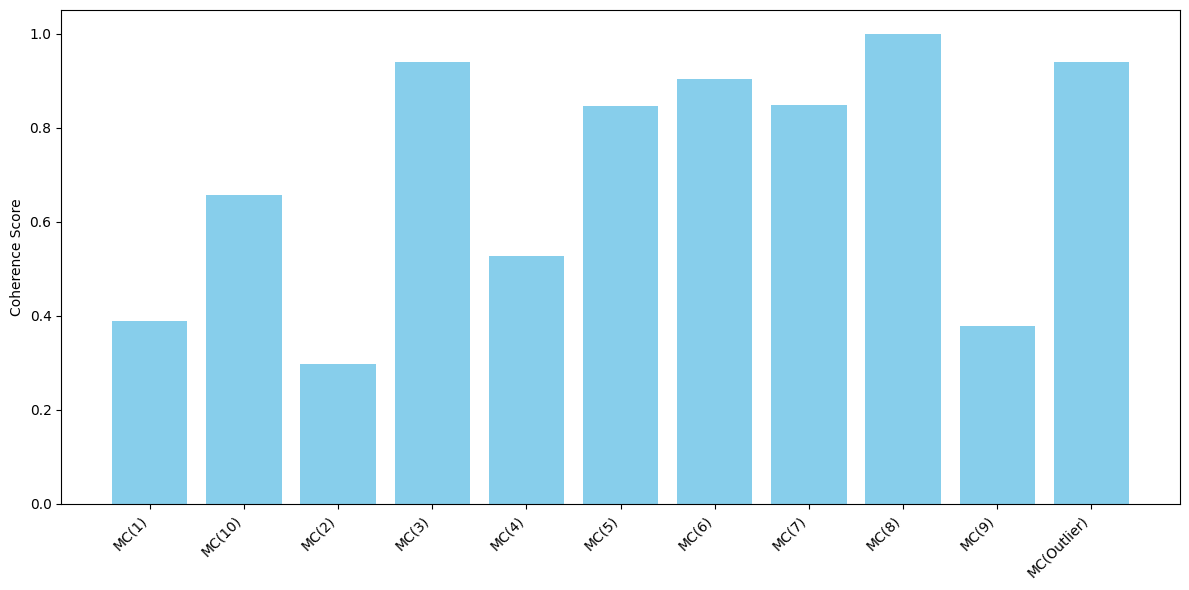

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(coherence_scores.keys(), coherence_scores.values(), color='skyblue')
plt.xticks(rotation=45, ha="right")
plt.ylabel("Coherence Score")
plt.title("")
plt.tight_layout()
plt.show()

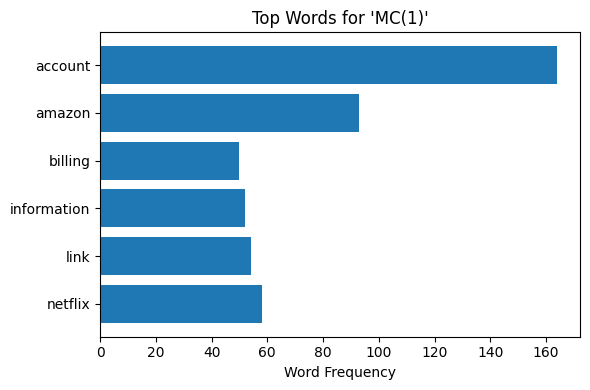

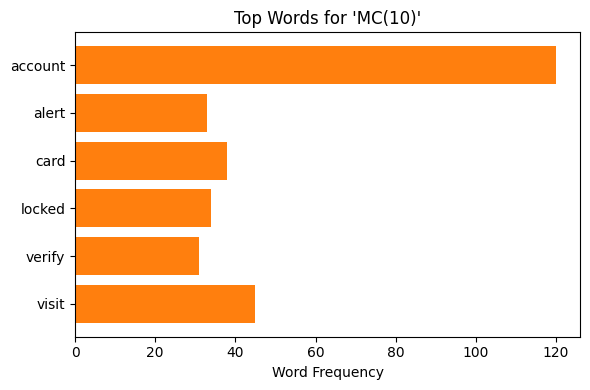

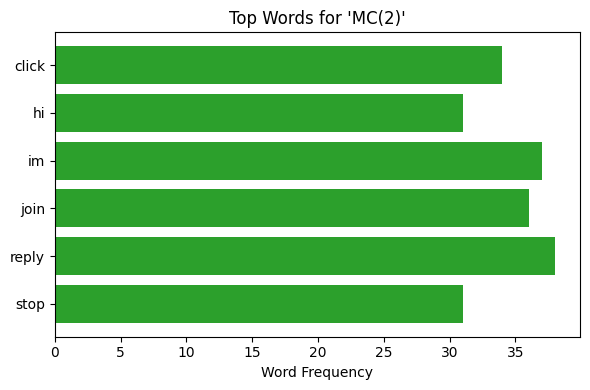

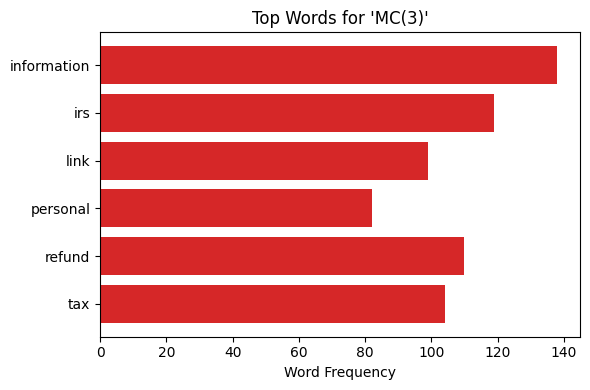

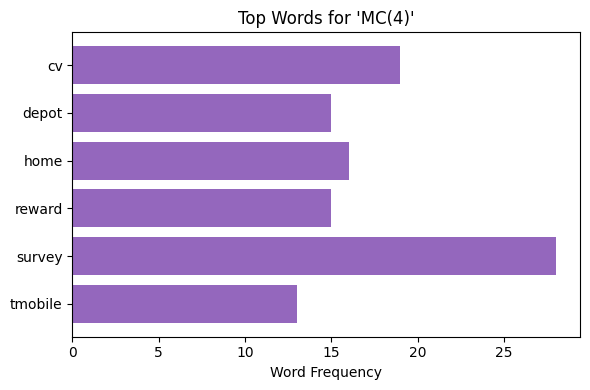

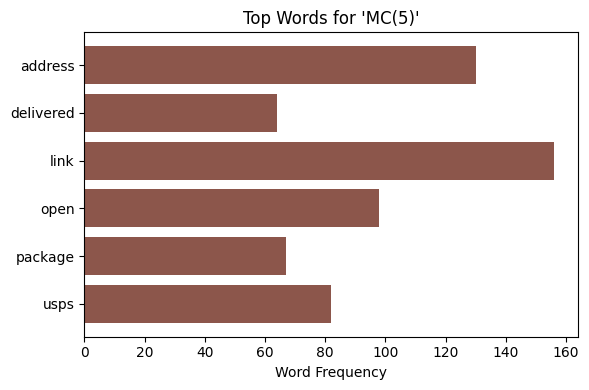

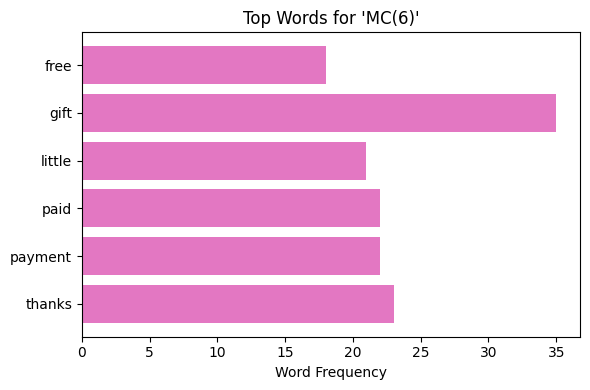

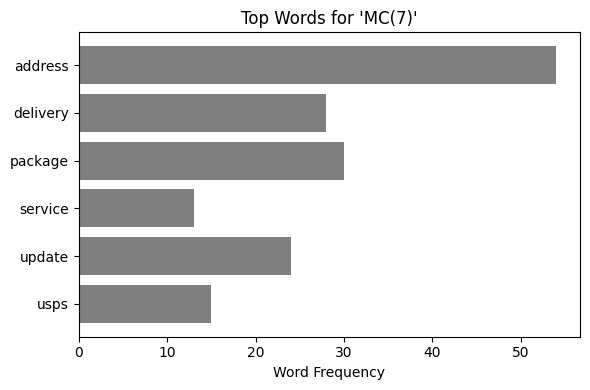

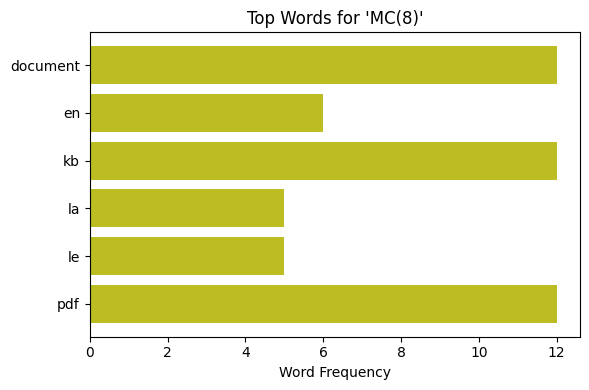

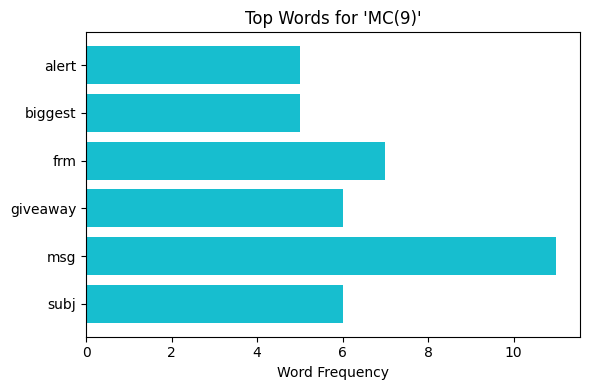

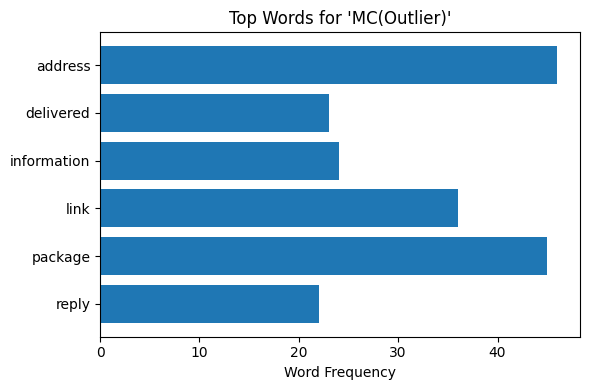

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Step 1: Group messages by 'Merged_Cluster_name'
df['SuperCleanedMessage'] = df['SuperCleanedMessage'].fillna('').astype(str)
grouped_clusters = df.groupby('Merged_Cluster_name')['SuperCleanedMessage'].apply(' '.join)

# Step 2: Extract top words for each cluster using CountVectorizer
top_n = 6  # Number of top words to display per cluster

# Define a color palette (e.g., tab10 colors)
colors = plt.cm.tab10.colors

for i, (cluster_name, text) in enumerate(grouped_clusters.items()):
    # Generate word frequencies using CountVectorizer
    vectorizer = CountVectorizer(stop_words='english', max_features=top_n)
    X = vectorizer.fit_transform([text])
    word_freq = dict(zip(vectorizer.get_feature_names_out(), X.toarray()[0]))

    # Step 3: Plot bar chart for the cluster
    plt.figure(figsize=(6, 4))
    plt.barh(list(word_freq.keys()), list(word_freq.values()), color=colors[i % len(colors)])
    plt.gca().invert_yaxis()  # Invert y-axis for better appearance
    plt.title(f"Top Words for '{cluster_name}'")
    plt.xlabel("Word Frequency")
    plt.tight_layout()
    plt.show()



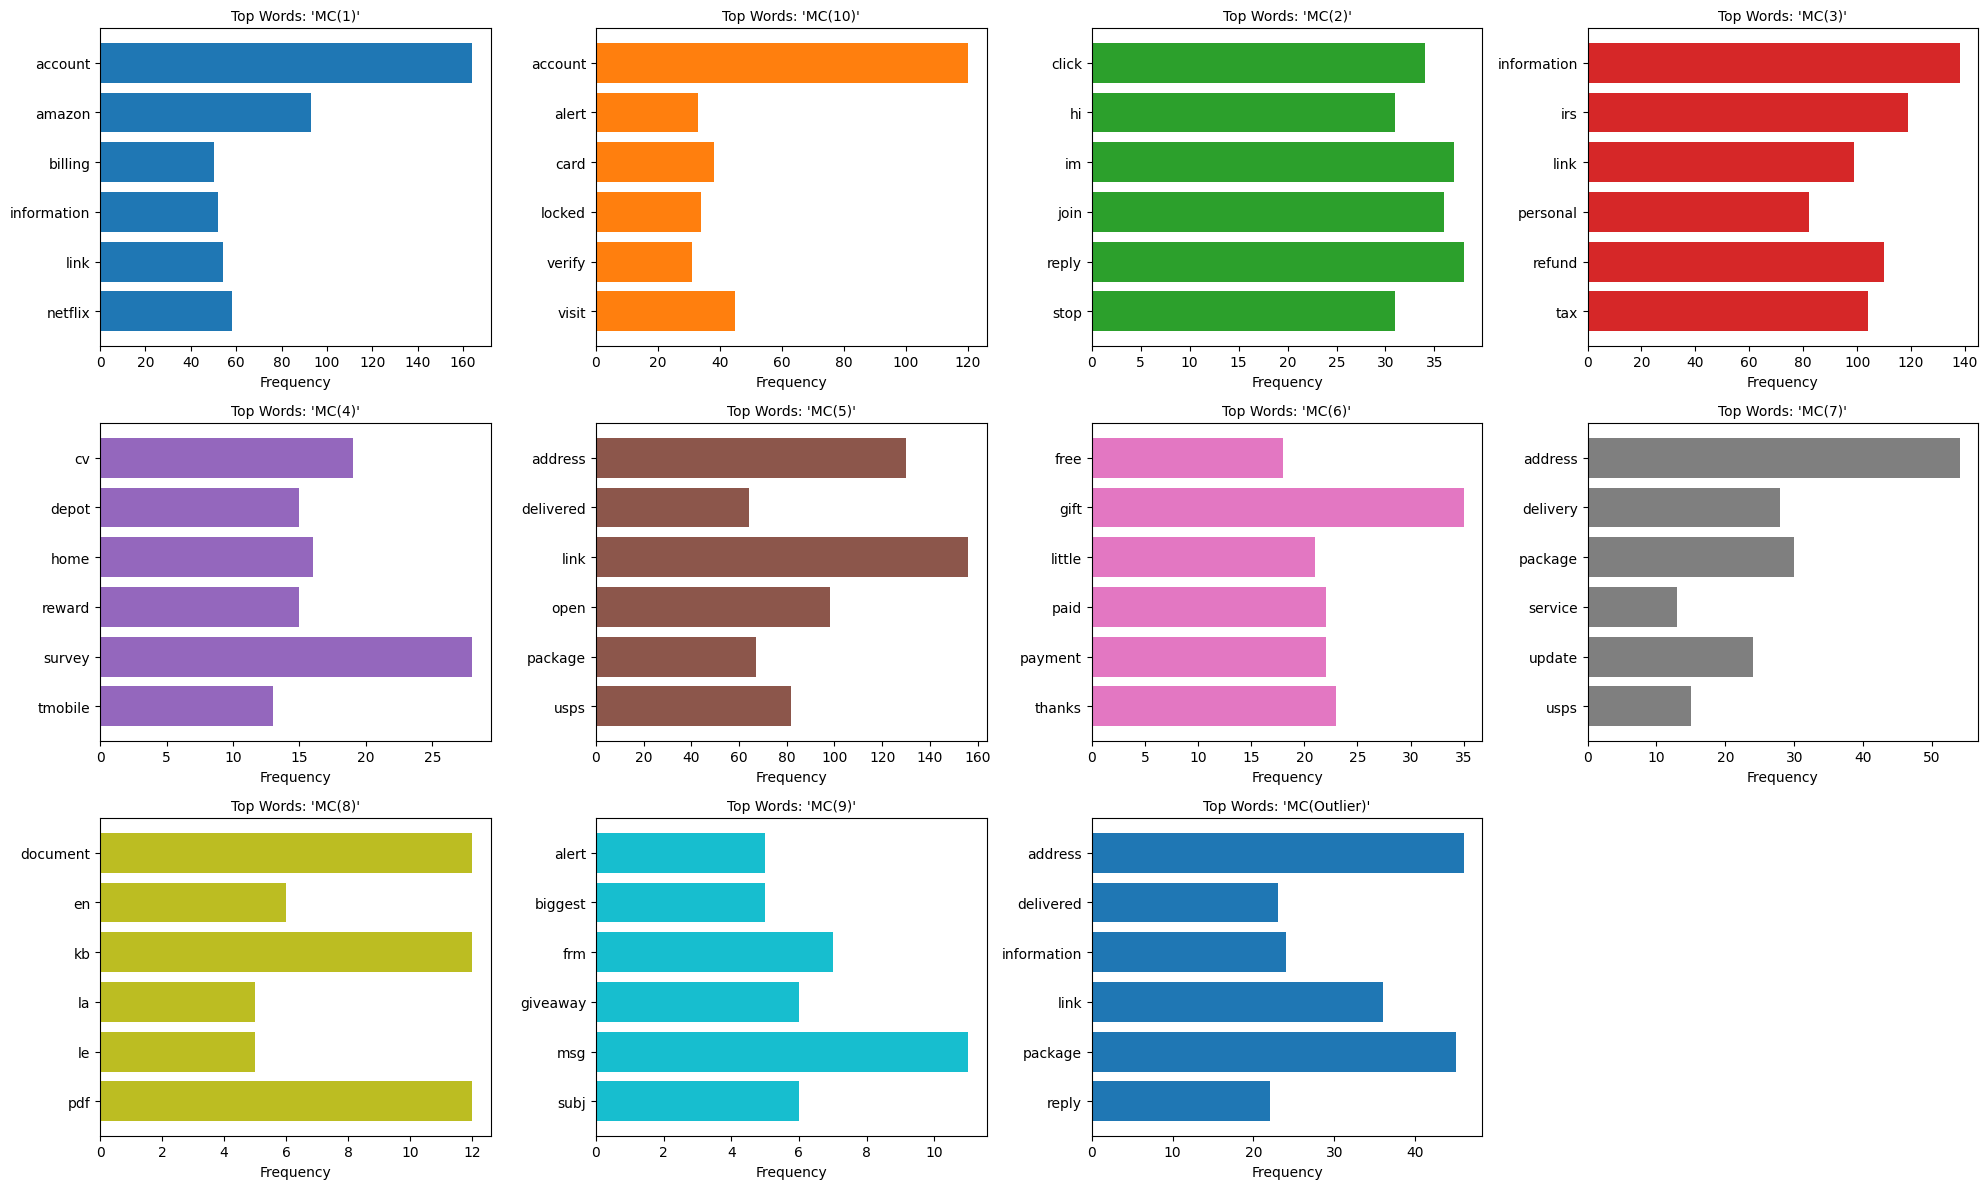

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Step 1: Group messages by 'Merged_Cluster_name'
df['SuperCleanedMessage'] = df['SuperCleanedMessage'].fillna('').astype(str)
grouped_clusters = df.groupby('Merged_Cluster_name')['SuperCleanedMessage'].apply(' '.join)

# Step 2: Extract top words for each cluster using CountVectorizer
top_n = 6  # Number of top words to display per cluster

# Define a color palette
colors = plt.cm.tab10.colors

# Step 3: Set up subplots grid (4 charts per row)
num_clusters = len(grouped_clusters)
fig, axes = plt.subplots((num_clusters + 3) // 4, 4, figsize=(20, 4 * ((num_clusters + 3) // 4)))
axes = axes.flatten()  # Flatten the axes for easier iteration

# Step 4: Generate charts
for i, (cluster_name, text) in enumerate(grouped_clusters.items()):
    # Generate word frequencies
    vectorizer = CountVectorizer(stop_words='english', max_features=top_n)
    X = vectorizer.fit_transform([text])
    word_freq = dict(zip(vectorizer.get_feature_names_out(), X.toarray()[0]))

    # Bar chart for current cluster
    axes[i].barh(list(word_freq.keys()), list(word_freq.values()), color=colors[i % len(colors)])
    axes[i].invert_yaxis()
    axes[i].set_title(f"Top Words: '{cluster_name}'", fontsize=10)
    axes[i].set_xlabel("Frequency")

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Step 5: Adjust layout and display
plt.tight_layout()
plt.show()


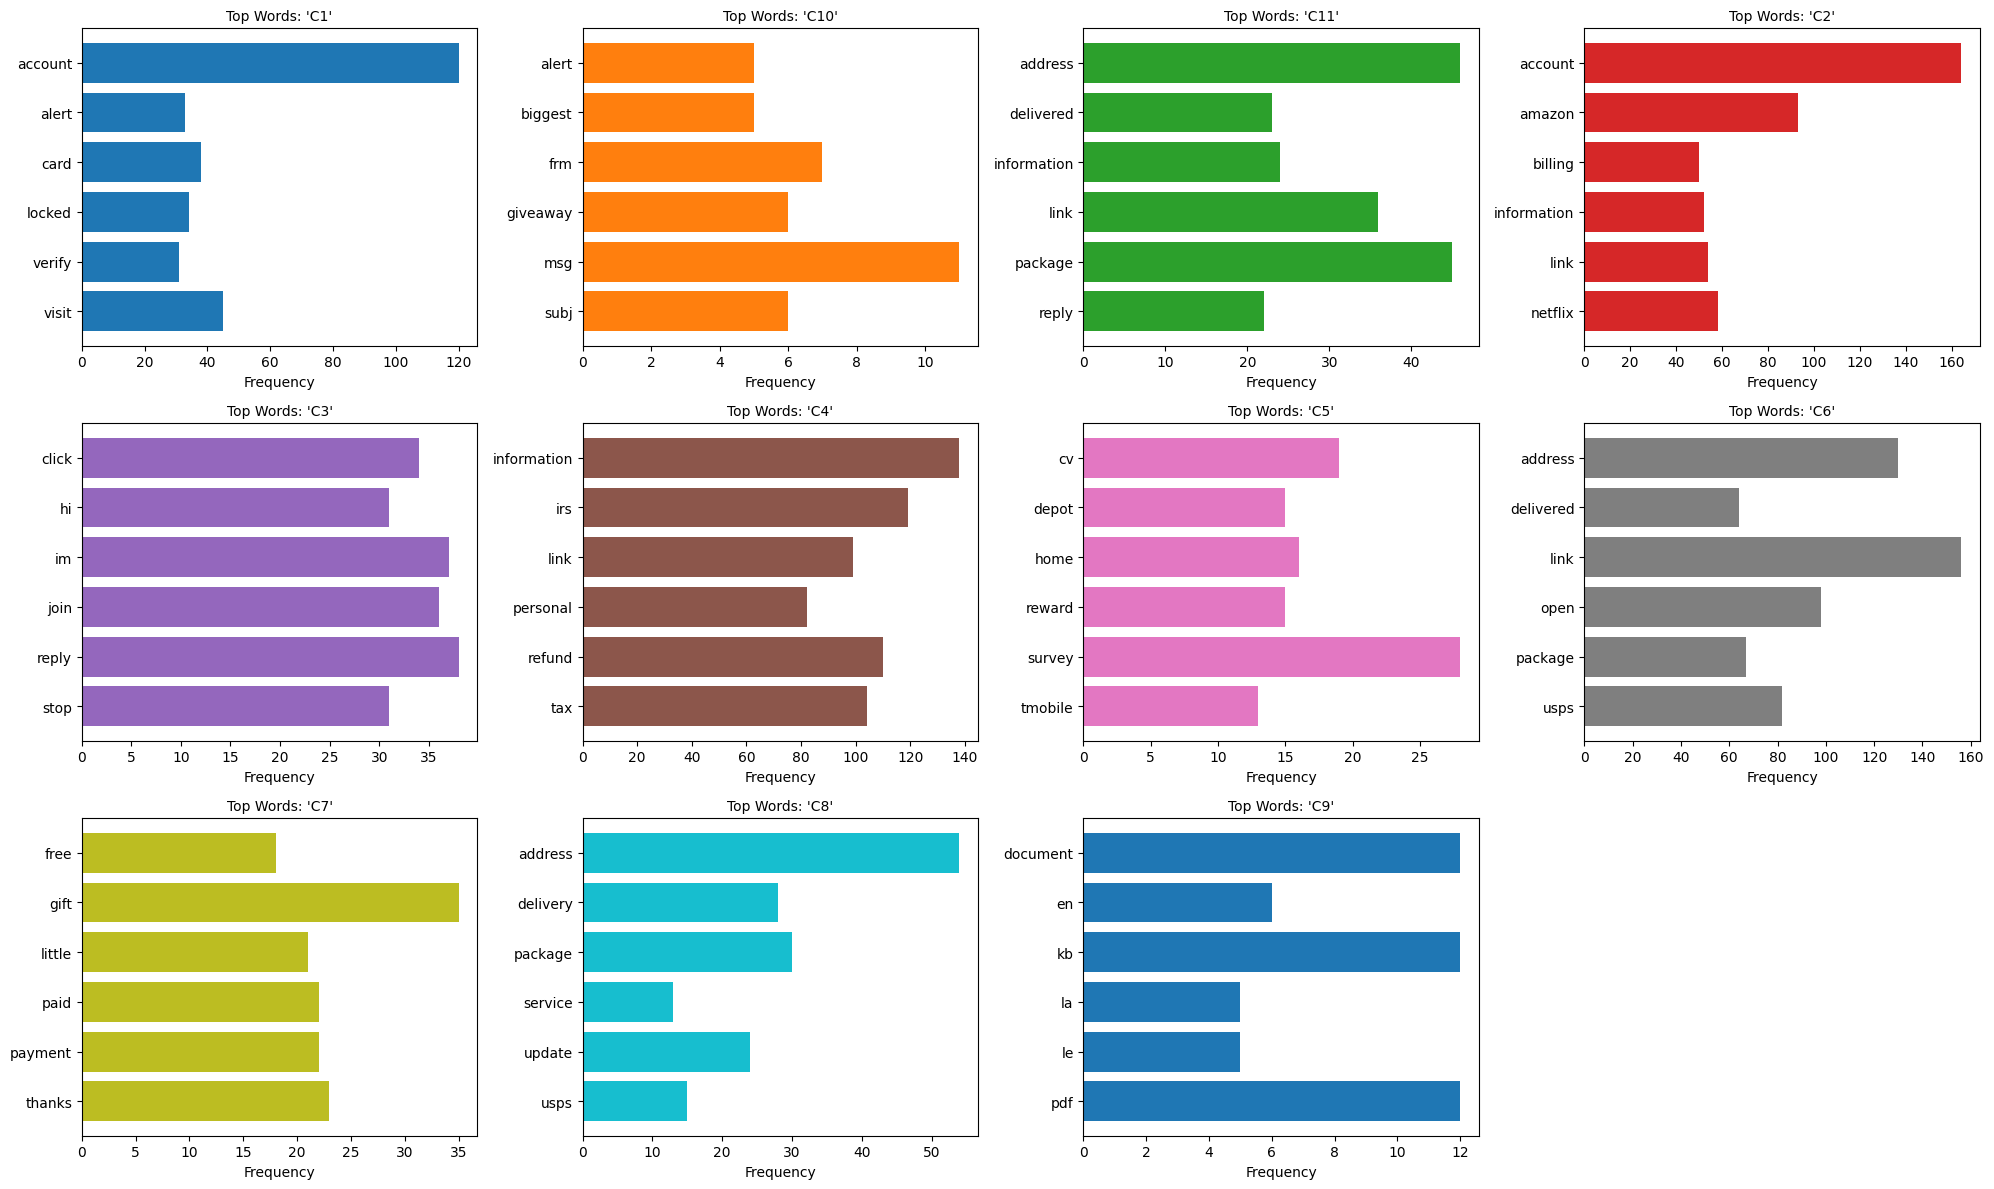

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Step 1: Replace 'Merged_Cluster_name' values with C1, C2, ...
df['SuperCleanedMessage'] = df['SuperCleanedMessage'].fillna('').astype(str)
unique_clusters = df['Merged_Cluster_name'].unique()
cluster_rename_map = {old: f"C{i+1}" for i, old in enumerate(unique_clusters)}
df['Renamed_Cluster'] = df['Merged_Cluster_name'].map(cluster_rename_map)

# Group messages by new cluster names
grouped_clusters = df.groupby('Renamed_Cluster')['SuperCleanedMessage'].apply(' '.join)

# Step 2: Extract top words for each cluster using CountVectorizer
top_n = 6  # Number of top words to display per cluster

# Define a color palette
colors = plt.cm.tab10.colors

# Step 3: Set up subplots grid (4 charts per row)
num_clusters = len(grouped_clusters)
fig, axes = plt.subplots((num_clusters + 3) // 4, 4, figsize=(20, 4 * ((num_clusters + 3) // 4)))
axes = axes.flatten()  # Flatten the axes for easier iteration

# Step 4: Generate charts
for i, (cluster_name, text) in enumerate(grouped_clusters.items()):
    # Generate word frequencies
    vectorizer = CountVectorizer(stop_words='english', max_features=top_n)
    X = vectorizer.fit_transform([text])
    word_freq = dict(zip(vectorizer.get_feature_names_out(), X.toarray()[0]))

    # Bar chart for current cluster
    axes[i].barh(list(word_freq.keys()), list(word_freq.values()), color=colors[i % len(colors)])
    axes[i].invert_yaxis()
    axes[i].set_title(f"Top Words: '{cluster_name}'", fontsize=10)
    axes[i].set_xlabel("Frequency")

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Step 5: Adjust layout and display
plt.tight_layout()
plt.show()


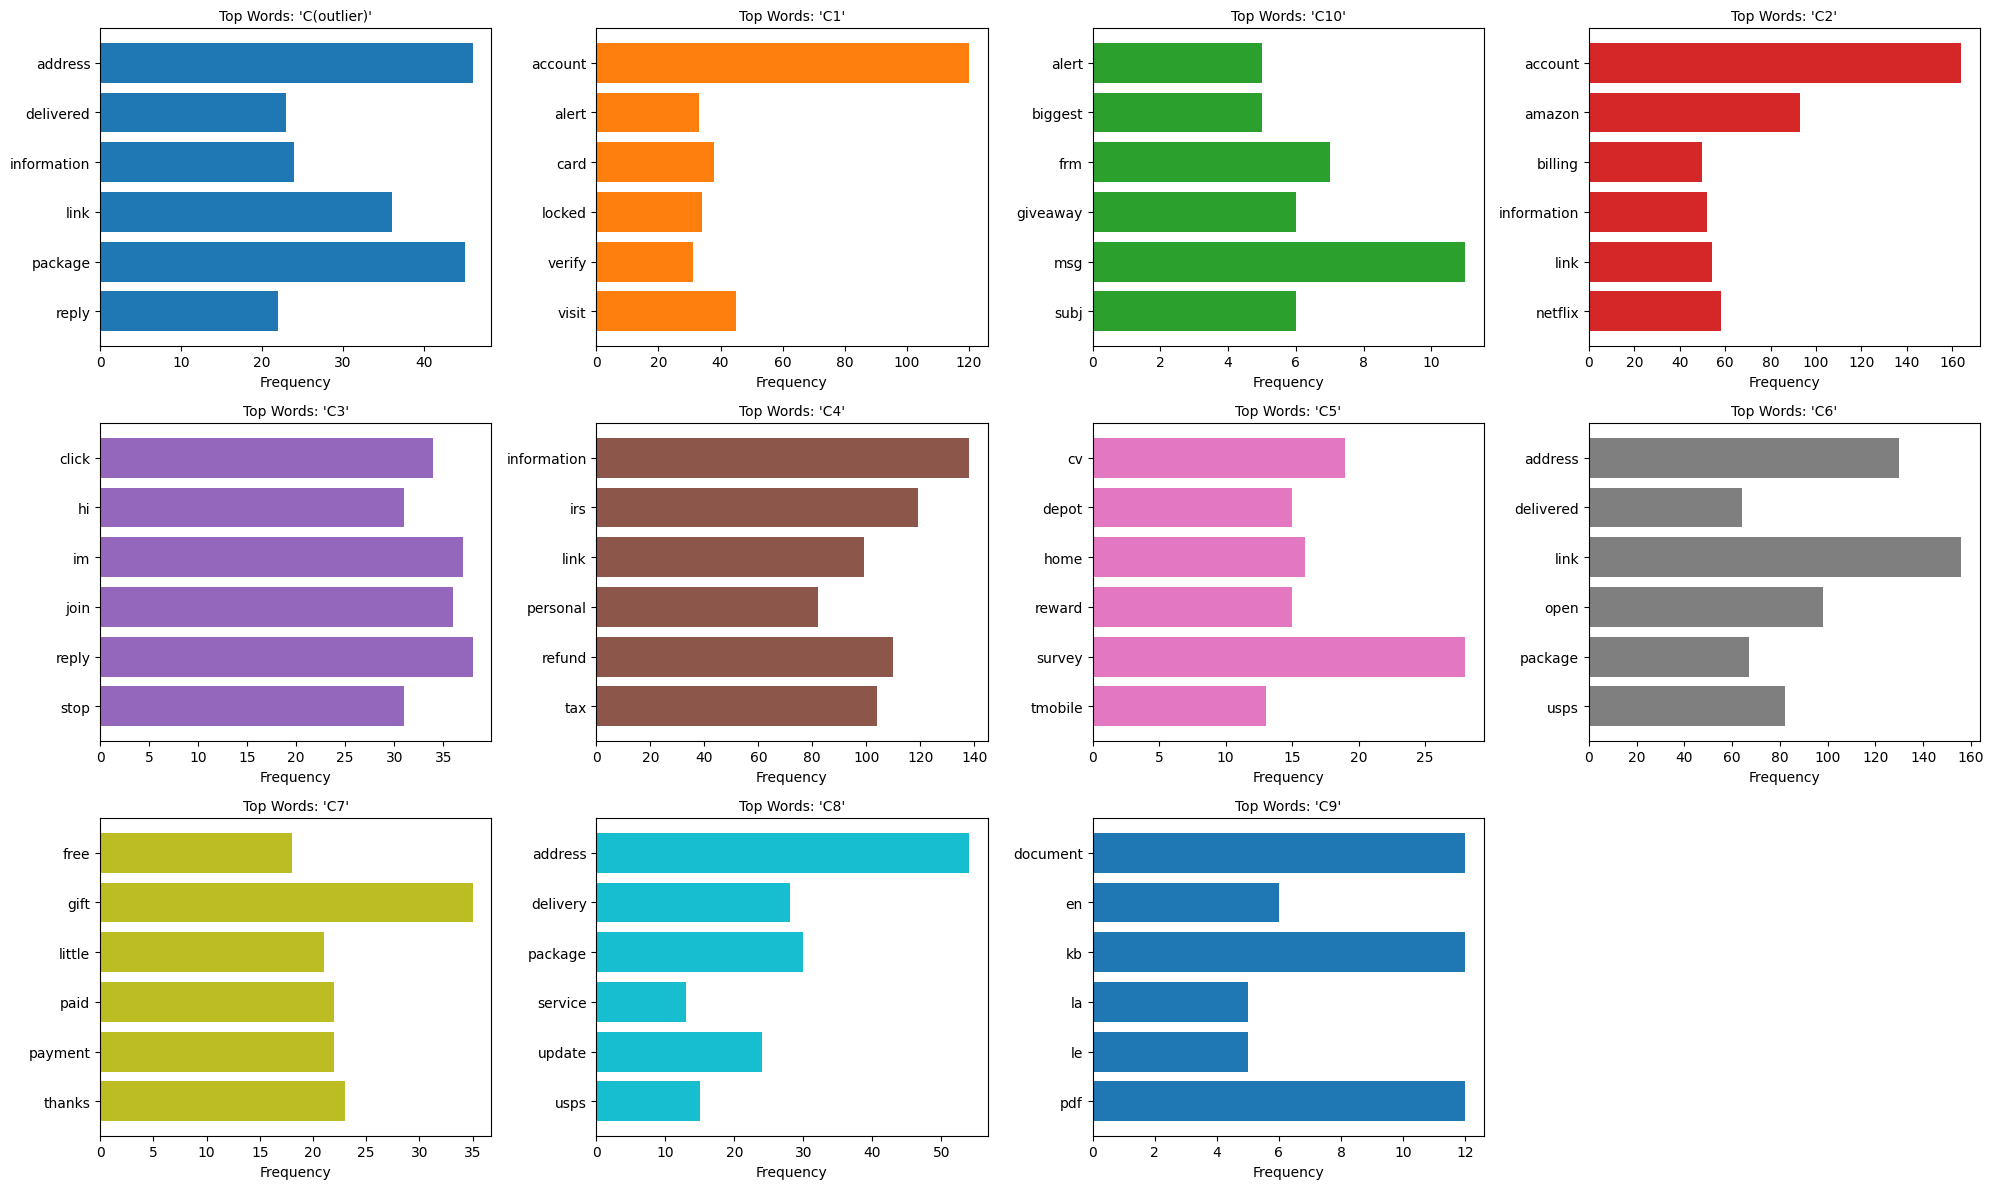

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Step 1: Replace 'Merged_Cluster_name' values with C1, C2, ..., and handle outliers
df['SuperCleanedMessage'] = df['SuperCleanedMessage'].fillna('').astype(str)

# Generate the rename mapping
unique_clusters = df['Merged_Cluster_name'].unique()
cluster_rename_map = {
    old: f"C(outlier)" if "outlier" in old.lower() else f"C{i+1}"
    for i, old in enumerate(unique_clusters)
}
df['Renamed_Cluster'] = df['Merged_Cluster_name'].map(cluster_rename_map)

# Group messages by new cluster names
grouped_clusters = df.groupby('Renamed_Cluster')['SuperCleanedMessage'].apply(' '.join)

# Step 2: Extract top words for each cluster using CountVectorizer
top_n = 6  # Number of top words to display per cluster

# Define a color palette
colors = plt.cm.tab10.colors

# Step 3: Set up subplots grid (4 charts per row)
num_clusters = len(grouped_clusters)
fig, axes = plt.subplots((num_clusters + 3) // 4, 4, figsize=(20, 4 * ((num_clusters + 3) // 4)))
axes = axes.flatten()  # Flatten the axes for easier iteration

# Step 4: Generate charts
for i, (cluster_name, text) in enumerate(grouped_clusters.items()):
    # Generate word frequencies
    vectorizer = CountVectorizer(stop_words='english', max_features=top_n)
    X = vectorizer.fit_transform([text])
    word_freq = dict(zip(vectorizer.get_feature_names_out(), X.toarray()[0]))

    # Bar chart for current cluster
    axes[i].barh(list(word_freq.keys()), list(word_freq.values()), color=colors[i % len(colors)])
    axes[i].invert_yaxis()
    axes[i].set_title(f"Top Words: '{cluster_name}'", fontsize=10)
    axes[i].set_xlabel("Frequency")

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Step 5: Adjust layout and display
plt.tight_layout()
plt.show()


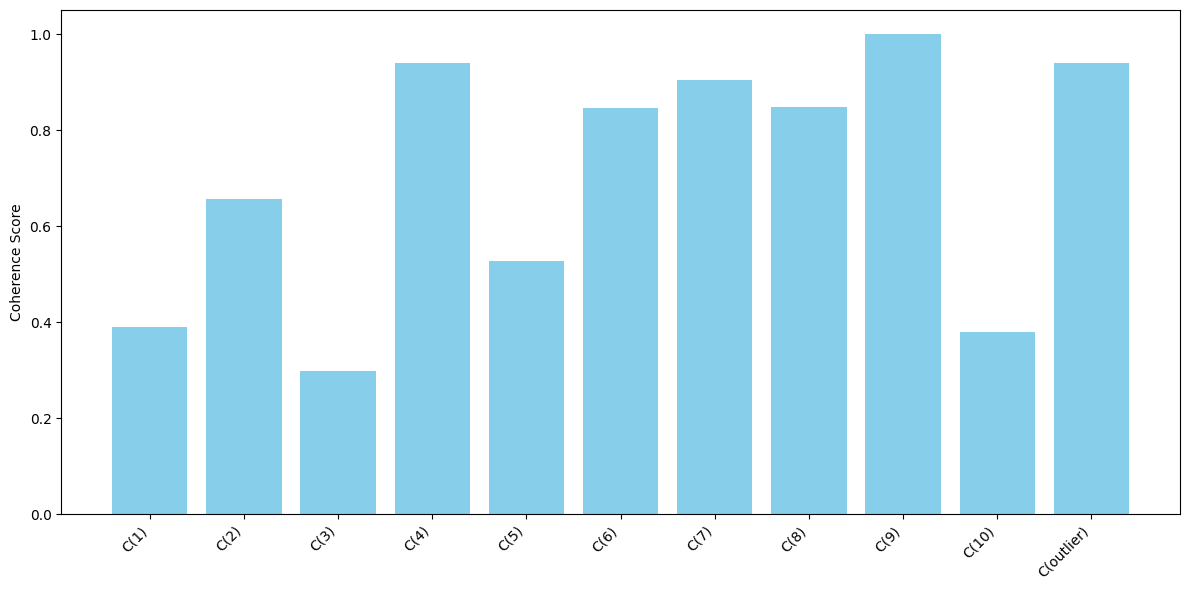

In [ ]:
# Step 1: Rename labels from MC(1), MC(2), ..., MC(outlier) to C(1), C(2), ..., C(outlier)
renamed_labels = {
    label: f"C(outlier)" if "outlier" in label.lower() else f"C({i+1})"
    for i, label in enumerate(coherence_scores.keys())
}

# Step 2: Create a new dictionary with renamed labels
renamed_coherence_scores = {renamed_labels[k]: v for k, v in coherence_scores.items()}

# Step 3: Plot the coherence scores with updated labels
plt.figure(figsize=(12, 6))
plt.bar(renamed_coherence_scores.keys(), renamed_coherence_scores.values(), color='skyblue')
plt.xticks(rotation=45, ha="right")
plt.ylabel("Coherence Score")
plt.title("")
plt.tight_layout()
plt.show()


In [ ]:
# Step 1: Rename clusters (MC -> C) and handle outliers
df['Renamed_Cluster'] = df['Merged_Cluster_name'].apply(
    lambda x: f"C(outlier)" if "outlier" in x.lower() else x.replace("MC(", "C(").replace(")", "")
)

# Step 2: Extract suggested topics and coherence scores
suggested_topics = df.groupby('Renamed_Cluster')['SuperCleanedMessage'].apply(lambda x: ', '.join(x.head(3))).to_dict()

# Print coherence scores with suggested topics
print("Coherence Scores and Suggested Topics for Each Cluster:\n")
for cluster, score in coherence_scores.items():
    renamed_cluster = f"C(outlier)" if "outlier" in cluster.lower() else cluster.replace("MC(", "C(").replace(")", "")
    print(f"Cluster {renamed_cluster}:")
    print(f"  Coherence Score: {score:.4f}")
    print(f"  Suggested Topics: {suggested_topics.get(renamed_cluster, 'No Data')}\n")


Coherence Scores and Suggested Topics for Each Cluster:

Cluster C(1:
  Coherence Score: 0.3889
  Suggested Topics: subject security alert access amazon account limited due unusual activity login blocked new zealand device mobile safari iphone o restore account click link verify account within hour amaz, subject security alert access amazon account limited due unusual activity login blocked new zealand device mobile safari iphone o restore account click link verify account within hour amaz view, subject unusual activity weve suspend amazon account due unusual activity new login attempt blocked mozilla firefox russia amazon account locked system wasnt please verify link

Cluster C(10:
  Coherence Score: 0.6560
  Suggested Topics: bank america edd msg edd card temporarily suspended due unrecognized transaction attempt please review recent transaction, citialrt debit disabled visit regain, alert well fargo notification immediate action required visit

Cluster C(2:
  Coherence Score: 0.297

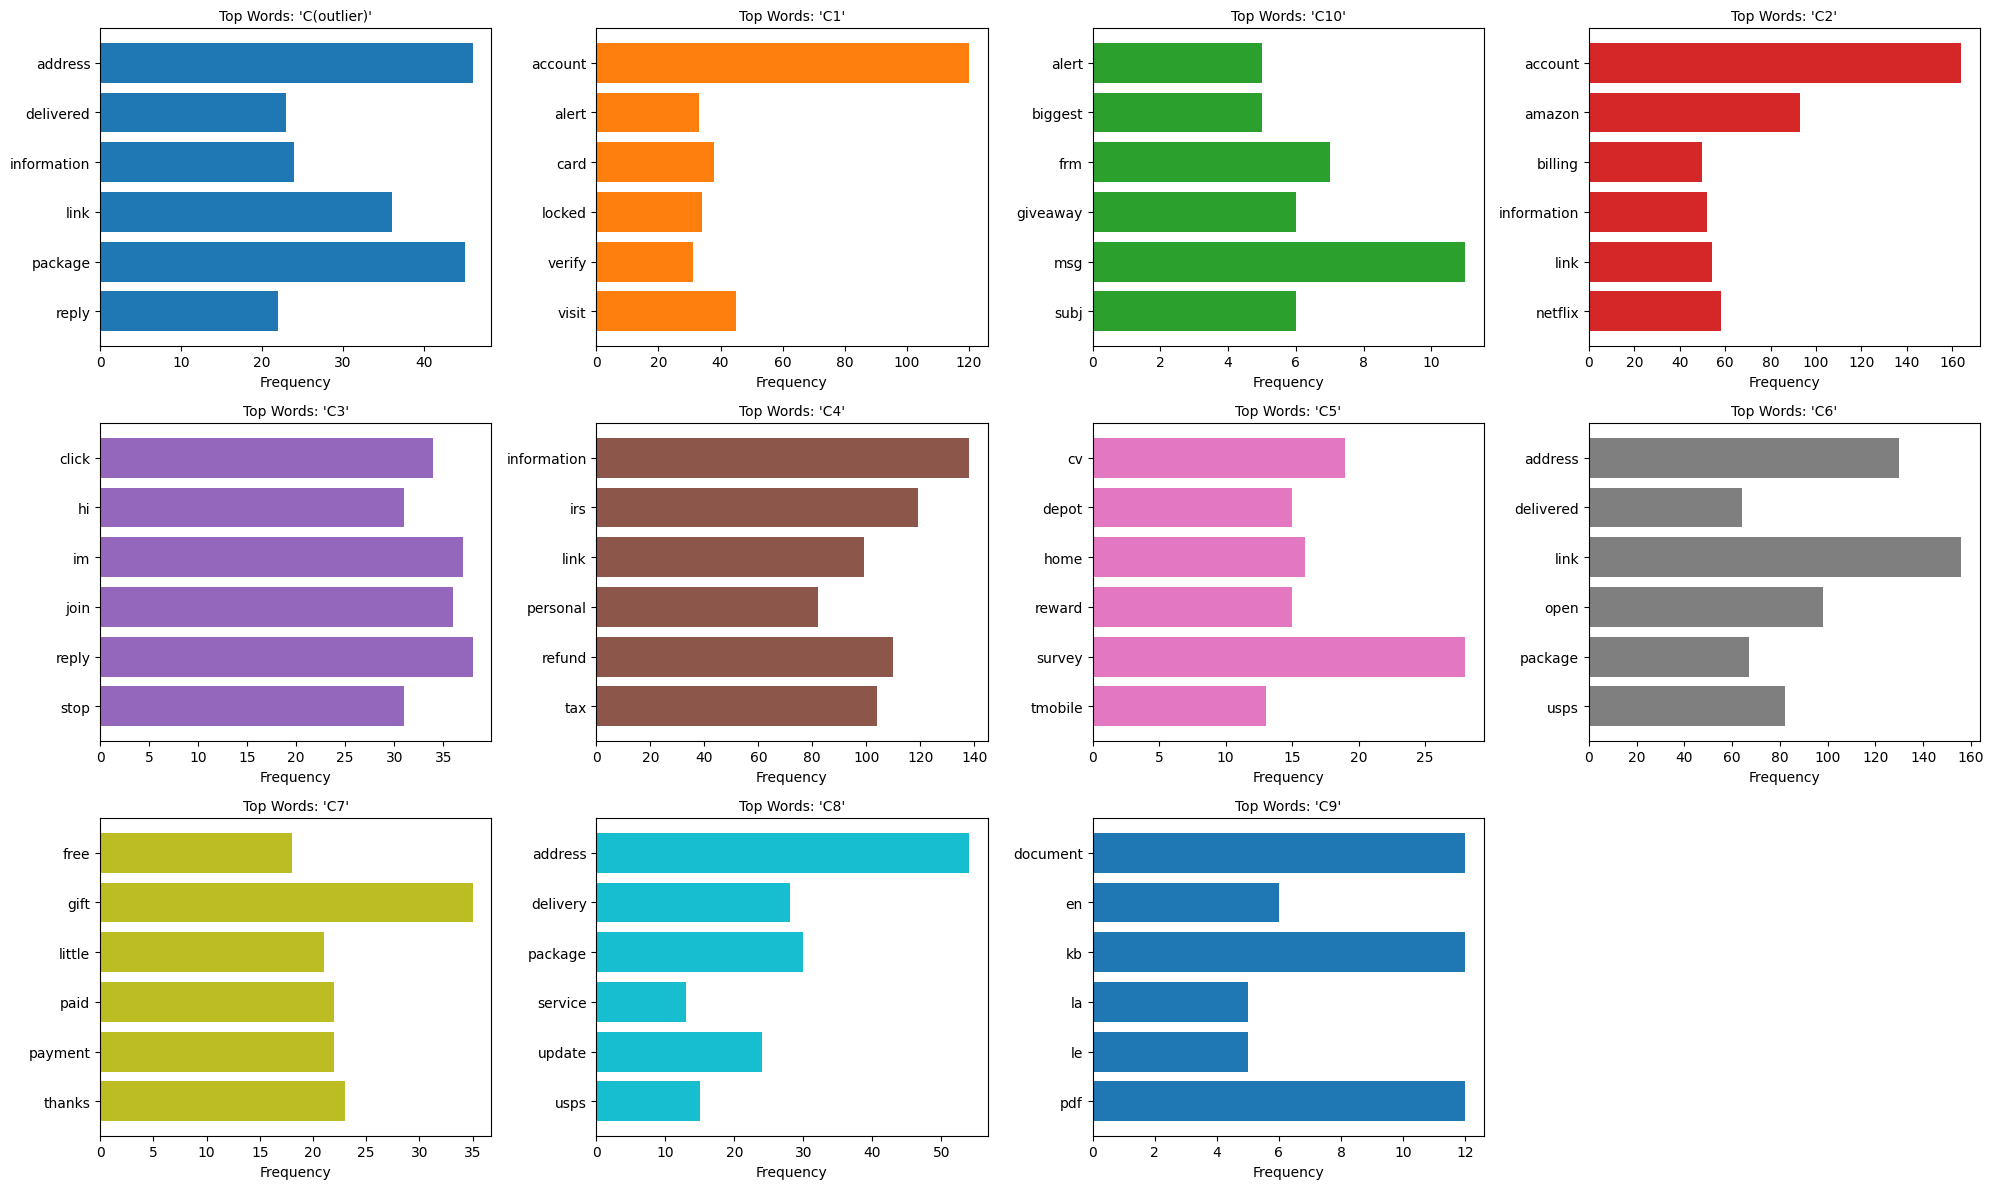

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Step 1: Replace 'Merged_Cluster_name' values with C1, C2, ..., and prioritize outliers at the end
df['SuperCleanedMessage'] = df['SuperCleanedMessage'].fillna('').astype(str)

# Separate 'outlier' clusters and normal clusters
normal_clusters = [name for name in df['Merged_Cluster_name'].unique() if 'outlier' not in name.lower()]
outlier_clusters = [name for name in df['Merged_Cluster_name'].unique() if 'outlier' in name.lower()]

# Generate the renaming map with priority: Normal clusters first, then outliers
cluster_rename_map = {name: f"C{i+1}" for i, name in enumerate(normal_clusters)}
for outlier_name in outlier_clusters:
    cluster_rename_map[outlier_name] = "C(outlier)"

# Apply the renaming
df['Renamed_Cluster'] = df['Merged_Cluster_name'].map(cluster_rename_map)

# Group messages by new cluster names
grouped_clusters = df.groupby('Renamed_Cluster')['SuperCleanedMessage'].apply(' '.join)

# Step 2: Extract top words for each cluster using CountVectorizer
top_n = 6  # Number of top words to display per cluster
colors = plt.cm.tab10.colors  # Define a color palette

# Step 3: Set up subplots grid (4 charts per row)
num_clusters = len(grouped_clusters)
fig, axes = plt.subplots((num_clusters + 3) // 4, 4, figsize=(20, 4 * ((num_clusters + 3) // 4)))
axes = axes.flatten()

# Step 4: Generate charts
for i, (cluster_name, text) in enumerate(sorted(grouped_clusters.items())):
    # Generate word frequencies
    vectorizer = CountVectorizer(stop_words='english', max_features=top_n)
    X = vectorizer.fit_transform([text])
    word_freq = dict(zip(vectorizer.get_feature_names_out(), X.toarray()[0]))

    # Bar chart for current cluster
    axes[i].barh(list(word_freq.keys()), list(word_freq.values()), color=colors[i % len(colors)])
    axes[i].invert_yaxis()
    axes[i].set_title(f"Top Words: '{cluster_name}'", fontsize=10)
    axes[i].set_xlabel("Frequency")

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Step 5: Adjust layout and display
plt.tight_layout()
plt.show()


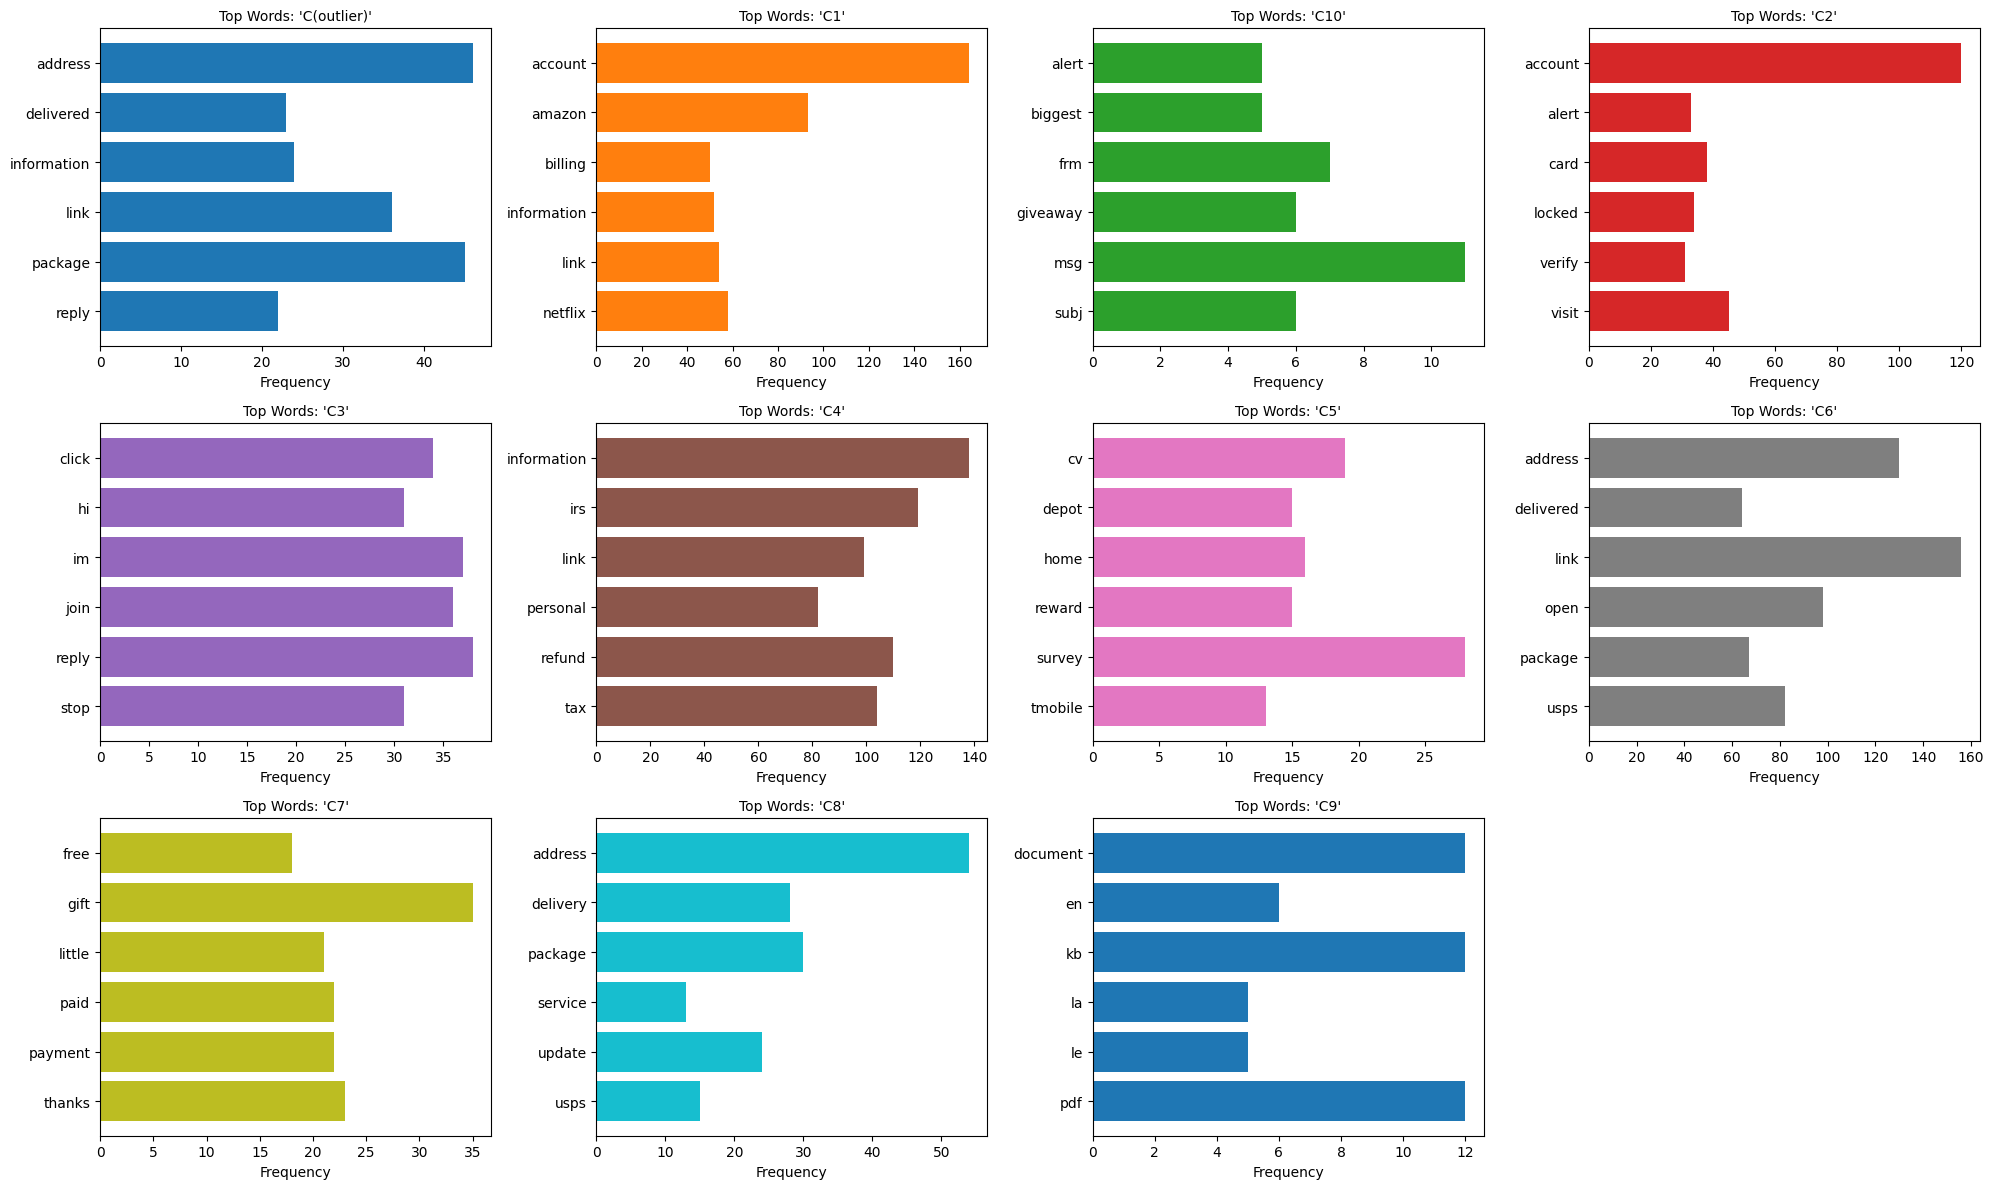

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Step 1: Rename clusters: Normal clusters -> C1, C2, ..., and Outlier -> C(outlier)
df['SuperCleanedMessage'] = df['SuperCleanedMessage'].fillna('').astype(str)

# Identify and sort cluster names
normal_clusters = sorted([name for name in df['Merged_Cluster_name'].unique() if "outlier" not in name.lower()])
outlier_clusters = [name for name in df['Merged_Cluster_name'].unique() if "outlier" in name.lower()]

# Generate rename mapping: Normal clusters first, then outlier
cluster_rename_map = {name: f"C{i+1}" for i, name in enumerate(normal_clusters)}
for outlier_name in outlier_clusters:
    cluster_rename_map[outlier_name] = "C(outlier)"

# Apply renaming
df['Renamed_Cluster'] = df['Merged_Cluster_name'].map(cluster_rename_map)

# Group messages by new cluster names
grouped_clusters = df.groupby('Renamed_Cluster')['SuperCleanedMessage'].apply(' '.join)

# Step 2: Extract top words for each cluster using CountVectorizer
top_n = 6  # Number of top words to display per cluster
colors = plt.cm.tab10.colors  # Define color palette

# Step 3: Set up subplots grid (4 charts per row)
num_clusters = len(grouped_clusters)
fig, axes = plt.subplots((num_clusters + 3) // 4, 4, figsize=(20, 4 * ((num_clusters + 3) // 4)))
axes = axes.flatten()

# Step 4: Sort the clusters to ensure correct order: C1, C2, ..., C(outlier)
sorted_clusters = sorted(grouped_clusters.items(), key=lambda x: (x[0] != "C(outlier)", x[0]))

# Step 5: Generate bar charts
for i, (cluster_name, text) in enumerate(sorted_clusters):
    # Generate word frequencies
    vectorizer = CountVectorizer(stop_words='english', max_features=top_n)
    X = vectorizer.fit_transform([text])
    word_freq = dict(zip(vectorizer.get_feature_names_out(), X.toarray()[0]))

    # Bar chart for current cluster
    axes[i].barh(list(word_freq.keys()), list(word_freq.values()), color=colors[i % len(colors)])
    axes[i].invert_yaxis()
    axes[i].set_title(f"Top Words: '{cluster_name}'", fontsize=10)
    axes[i].set_xlabel("Frequency")

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Step 6: Adjust layout and display
plt.tight_layout()
plt.show()


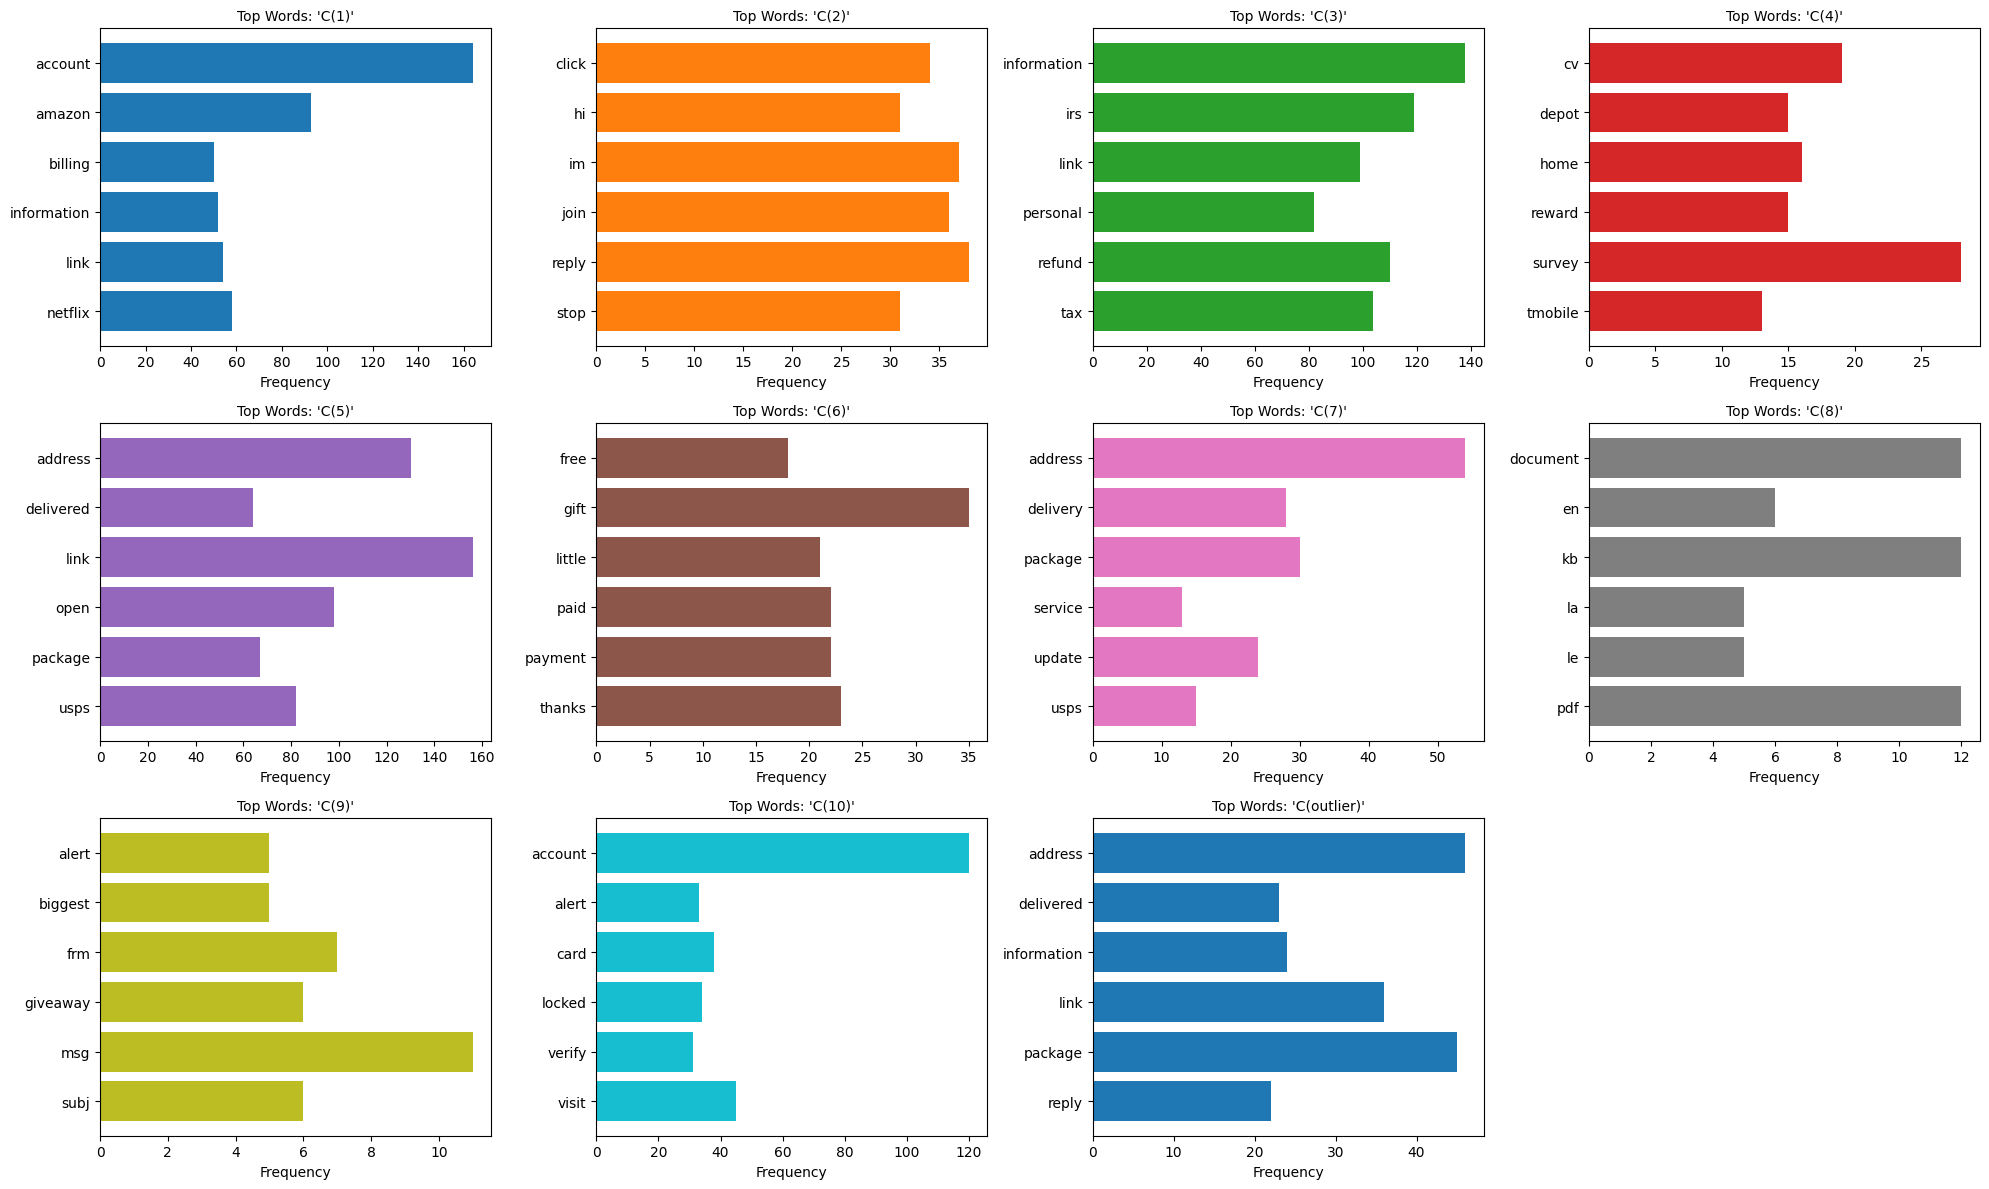

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import re

# Step 1: Rename clusters: Normal clusters -> C1, C2, ..., and Outlier -> C(outlier)
df['SuperCleanedMessage'] = df['SuperCleanedMessage'].fillna('').astype(str)

# Identify and sort cluster names
normal_clusters = [name for name in df['Merged_Cluster_name'].unique() if "outlier" not in name.lower()]
outlier_clusters = [name for name in df['Merged_Cluster_name'].unique() if "outlier" in name.lower()]

# Generate rename mapping: Normal clusters first, then outlier
cluster_rename_map = {}
for i, name in enumerate(sorted(normal_clusters, key=lambda x: int(re.search(r'\d+', x).group()))):
    cluster_rename_map[name] = f"C({i+1})"
for outlier_name in outlier_clusters:
    cluster_rename_map[outlier_name] = "C(outlier)"

# Apply renaming
df['Renamed_Cluster'] = df['Merged_Cluster_name'].map(cluster_rename_map)

# Group messages by new cluster names
grouped_clusters = df.groupby('Renamed_Cluster')['SuperCleanedMessage'].apply(' '.join)

# Step 2: Extract top words for each cluster using CountVectorizer
top_n = 6  # Number of top words to display per cluster
colors = plt.cm.tab10.colors  # Define color palette

# Step 3: Set up subplots grid (4 charts per row)
num_clusters = len(grouped_clusters)
fig, axes = plt.subplots((num_clusters + 3) // 4, 4, figsize=(20, 4 * ((num_clusters + 3) // 4)))
axes = axes.flatten()

# Step 4: Sort clusters correctly: C1, C2, ..., C(outlier)
sorted_clusters = sorted(grouped_clusters.items(), key=lambda x: (x[0] == "C(outlier)", int(re.search(r'\d+', x[0]).group()) if re.search(r'\d+', x[0]) else float('inf')))

# Step 5: Generate bar charts
for i, (cluster_name, text) in enumerate(sorted_clusters):
    # Generate word frequencies
    vectorizer = CountVectorizer(stop_words='english', max_features=top_n)
    X = vectorizer.fit_transform([text])
    word_freq = dict(zip(vectorizer.get_feature_names_out(), X.toarray()[0]))

    # Bar chart for current cluster
    axes[i].barh(list(word_freq.keys()), list(word_freq.values()), color=colors[i % len(colors)])
    axes[i].invert_yaxis()
    axes[i].set_title(f"Top Words: '{cluster_name}'", fontsize=10)
    axes[i].set_xlabel("Frequency")

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Step 6: Adjust layout and display
plt.tight_layout()
plt.show()
